# Monte Carlo integration example

Volume integration in 3-D

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Shape definition

In [2]:
# Return 1 for point inside sphere, 0 otherwise

def isInside(x,y,z) :
    "Sphere with unit radius and origing at (0,0,0)"
    r2 = x*x + y*y + z*z
    return int( r2 < 1 )

### (2) Run Monte Carlo integration of volume

In [3]:
def mcVol(Nmc):

    # Integration range (common for all coordinates)

    Xmin = -1.
    Xmax = 1.

    Vtot = (Xmax-Xmin)**3

    dV = Vtot/Nmc
    
    # Generate random points in space
    
    V = 0
    
    for imc in range(Nmc):
        x = np.random.uniform(Xmin,Xmax,size=3)
        V+=dV*isInside(x[0],x[1],x[2])
    
    return V

### (4) Integration with increasing precision

In [4]:
# Test values for number of divisions

n_tab = np.array([30,100,300,1000,3000,10000,30000,100000,300000,1000000])

# Main loop

v_tab = np.empty(n_tab.size)

print("Monte Carlo integration:")

for ind in range(n_tab.size):
    n = n_tab[ind]
    v_tab[ind] = mcVol(n)
    print(n,v_tab[ind])

Vexp = 4./3.*np.pi
print("Expected value: ",Vexp)

Monte Carlo integration:
30 3.9999999999999996
100 3.600000000000002
300 4.346666666666673
1000 4.248000000000003
3000 4.2293333333334
10000 4.163199999999672
30000 4.139199999999622
100000 4.17224000000209
300000 4.196453333345163
1000000 4.194591999953919
Expected value:  4.1887902047863905


### (4) Plot results

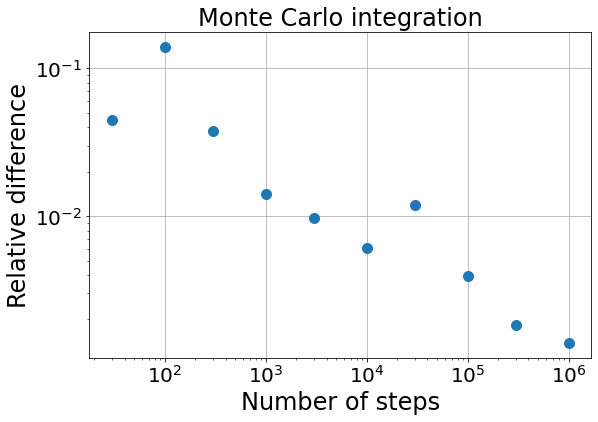

In [5]:
# Create result graph

dv_tab = np.abs(v_tab/Vexp - 1.)

plt.figure(figsize=(9, 6))

plt.loglog(n_tab,dv_tab,'o',markersize=10)

plt.title("Monte Carlo integration",size=24)
plt.xlabel('Number of steps',size=24)
plt.ylabel('Relative difference',size=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(which='major', axis='both')

fname = '05_mc_integration.png'
plt.savefig(fname)

plt.show()